## MLE Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### First, the Least Squares Method:

The more well known method for finding the linear regression coefficients is called **least squares**.

Let $\mathbf{X}$ be our (tall) features matrix of size $m \times n$ with $m > n$, and $\mathbf{y}$ the vector containing the target variables of dimension $m$, we assume a linear relationship between them.

Let $\mathbf{\tilde{X}} := (\mathbf{X}\;|\;\mathbf{1})$, the $m \times (n+1)$ matrix, using it instead of the original $\mathbf{X}$ will prevent us from having to use an additional vector for storing the bias terms.

Then, we want to find a vector of coeficients $\mathbf{w}$ such that $$\mathbf{\tilde{X}w} = \mathbf{y}$$

In practice, this is impossible since $\mathbf{y}$ will always be measured with some noise $\mathbb{\epsilon}$: ($\epsilon$ is a vector) $$\mathbf{\tilde{X}w} + \epsilon = \mathbf{y}$$ 

Therefore, we want $\mathbf{w}$ such that it minimizes $||\epsilon||^2$, giving us $$\mathbf{\tilde{X}w} = \mathbf{{y} - \epsilon} \;\text{,}\; \mathbf{\tilde{X}w} \simeq \mathbf{y}$$

We find the solution by minimizing the sum of squared errors $$\frac{\partial}{\partial \mathbf{w}} ||\mathbf{\tilde{X}w - \mathbf{{y}}}||^2 = 0$$
$$2\mathbf{\tilde{X}}^T(\mathbf{\tilde{X}w} - \mathbf{{y}}) = 0$$
$$\mathbf{w} = (\mathbf{\tilde{X}}^T\mathbf{\tilde{X}})^{-1} \mathbf{\tilde{X}}^T \mathbf{{y}}$$

### Implementation:

w0 = 3, w1 = 1


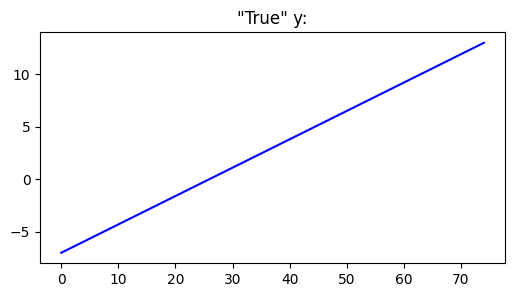

In [2]:
# defining our linear relationship

n = 75 # number of data points

x = np.linspace(-10, 10, n)

w0, w1 = np.random.randint(1, 5, 2)

print(f'w0 = {w0}, w1 = {w1}')

y = w0 + (w1 * x)

plt.figure(figsize=(6, 3))
plt.plot(list(range(n)), y, color='blue')
plt.title('"True" y:'); None

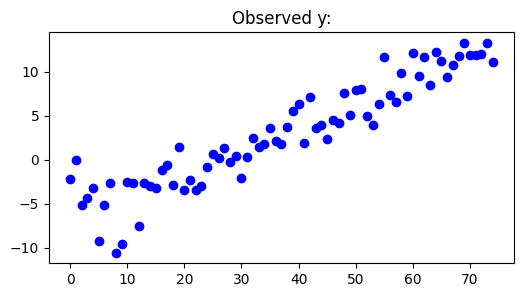

In [3]:
# adding noise 

noise = np.random.normal(size=n, scale=2)
y += noise

plt.figure(figsize=(6, 3))
plt.scatter(list(range(n)), y, color='blue')
plt.title('Observed y:'); None

In [4]:
# augmenting X with a vector of ones

X = np.array([x, np.ones(n)]).T
X.shape

(75, 2)

In [5]:
def least_squares(X, y):
    assert X.shape[0] == len(y)
    # least squares formula, using the Moore-Penrose pseudo-inverse
    return np.linalg.pinv(X.T @ X) @ X.T @ y

coefs = least_squares(X, y)
print(f'coefs: w1 ~= {coefs[0]:.1f}, w0 ~= {coefs[1]:.1f}')

coefs: w1 ~= 1.0, w0 ~= 3.0


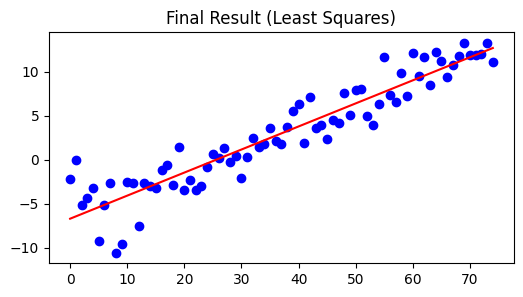

In [6]:
plt.figure(figsize=(6, 3))
plt.plot(list(range(n)), X @ coefs, color='red')
plt.scatter(list(range(n)), y, color='blue')
plt.title('Final Result (Least Squares)'); None

### The Maximum Likelihood Estimation: 

The method we are going to derive here is based on **estimating the parameters of a continuous probability distribution**, namely the **Gaussian (Normal) distribution**.

It's probability density function is given by:
$$x$$